Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Simon Mathias Linsel"
COLLABORATORS = "Marcus Culemann, Andreas Burger, Hannah Lange"

---

# MNIST - Regression
The aim of this exercise is to get some experience with logistic regression and regularisation. We
shall use the implementations of SGCClassifier and the LogisticRegression in sklearn for this exercise.
In this exercise we want to build a class can take a classifier object, training and test data and has the methods to fit the classifier to the dataset and predict labels. 
We will work with the MNIST dataset (classifying handwritten digits).

* Using the SGCClassifier and the LogisticRegression, build classifiers for the MNIST dataset.
* Find some handwritten digits which your classifiers are not capable of classifying correctly.
How do they differ from correctly classified digits?
* Scan over hyper-parameters (i.e. l1, l2 regularisation, different optimisers) and compare the
performance.
* Compare your results to results you would have obtained by pure random guessing.

Please have a look at the excellent documentation of sklearn. There you will also find detailed information on the different solvers.

To complete all this tasks fill in the class Classifier and follow the instructions.


In [44]:
# Import necessary libraries
import time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.linear_model import LogisticRegression, SGDClassifier



In [97]:
class Classifier:
    def __init__(self, model, x_train, y_train, x_test, y_test):
        self.y_test = y_test
        self.x_test = x_test
        self.y_train = y_train
        self.x_train = x_train
        self.model = model
        self.run_time = None 

        self.score = None
        self.prediction = None
        
    def reshape_x(self):
        """ write a function that reshapes self.x_train and self.y_train into a 2D array such that they can be 
        processed by LinearRegression and SGDClassifier. 
        The original shape of the MNIST dataset is (number of samples, 28, 28). 
        The function should not return anything. """
       
        self.x_train = np.array(self.x_train).reshape((60000,784))
        self.x_test = np.array(self.x_test).reshape((10000,784))
        
        
    def fit(self):
        """write a function that fits the classifier to the train set, 
        store the time that this takes in self.run_time
        and the model score in self.score as (training score, test score). 
        The function should not return anything."""
        
        self.reshape_x()
        
        # fit data
        start = time.perf_counter()
        self.model.fit(self.x_train[:10000], self.y_train[:10000])
        end = time.perf_counter()
        self.run_time = end-start

        # compute accuracy
        self.score = [self.model.score(self.x_train, self.y_train), self.model.score(self.x_test, self.y_test)]

        
    def predict(self):
        """ write a function that predicts the labels of the images 
        in the test dataset and stores them in self.prediction. 
        self.prediction should be of the same shape as self.y_test.
        The function should not return anything."""
        
        self.prediction = self.model.predict(self.x_test)
        
    def find_incorrect_classified(self):
        """ write a function that finds the incorrectly classified digits and returns 
        those images, the incorrectly predicted labels and the true labels
        The images should be an ndarray of shape (number of incorrectly classified pictures, 28, 28)"""
        
        pictures = None
        incorrect_labels = None
        true_labels = None
        
        for i in range(self.prediction.size):
            if self.prediction[i] == self.y_test[i]:
                if true_labels is None:
                    true_labels = [i]
                else:
                    true_labels = np.vstack((true_labels,i))
            else:
                if incorrect_labels is None:
                    incorrect_labels = [i]
                else:
                    incorrect_labels = np.vstack((incorrect_labels,i))
                if pictures is None:
                    pictures = np.reshape(self.x_test[i],[1,28,28])
                else:
                    pictures = np.vstack((pictures,np.reshape(self.x_test[i],[1,28,28])))
              
        return pictures, incorrect_labels, true_labels
        

In [46]:
# fetching the mnist data set and preprocessing it
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [47]:
# your solution is graded here

In [48]:
# your solution is graded here

In [49]:
# your solution is graded here

In [50]:
# your solution is graded here

In [51]:
# your solution is graded here


Now use the classifier class to train a SGDClassifier and find some incorrectly classified digits. Use the find_incorrect_digit function to find the wrongly classified digits and store the pictures in an array called sgd_pictures, such that they can be plotted by the code snipped below your solution. (hint: training on all 6000 samples can take some time, if you're on a slow machine, so it is okay to use fewer samples)
What kind of digits were not correctly recognised?

In [98]:
# use SGDClassifier here
clf = SGDClassifier()
sgdClassifier = Classifier(clf, x_train, y_train, x_test, y_test)
sgdClassifier.fit()
sgdClassifier.predict()
sgd_pictures, incorrectlabels, truelabels = sgdClassifier.find_incorrect_classified()

(1100, 28, 28)
(1100, 1)
(8900, 1)


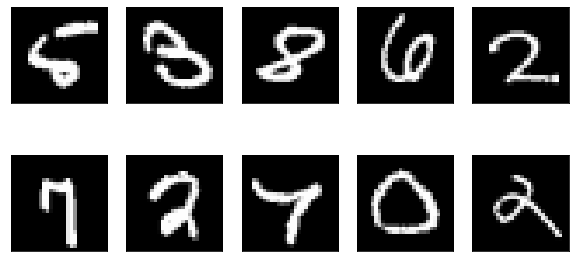

In [99]:
#plot a few wrongly classified digits next to each other, you don't need to do anything here
plt.figure(figsize=(10, 5))
for i in range(10):
    l2_plot = plt.subplot(2, 5, i + 1)
    try: 
        l2_plot.imshow(sgd_pictures[i], cmap='gray')
    except:
        raise AssertionError
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())


Now do the same for Logistic Regression (name the array logreg_pictures this time). Is there a difference to the images from before?


In [100]:
# use LogisticRegression here
clf = LogisticRegression(C=1e15, multi_class='multinomial', penalty='l2',solver='sag', tol=0.01)
logisticClassifier = Classifier(clf, x_train, y_train, x_test, y_test)
logisticClassifier.fit()
logisticClassifier.predict()
logreg_pictures, incorrect_labels, true_labels = logisticClassifier.find_incorrect_classified()


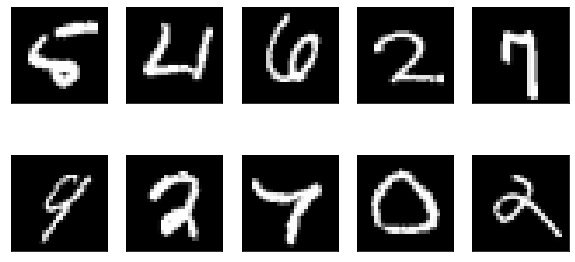

In [101]:
plt.figure(figsize=(10, 5))
for i in range(10):
    logreg_plot = plt.subplot(2, 5, i + 1)
    try: 
        logreg_plot.imshow(logreg_pictures[i], cmap='gray')
    except:
        raise AssertionError
    logreg_plot.set_xticks(())
    logreg_plot.set_yticks(())


* For LogisticRegression or SGDClassifier scan over hyper-parameters (i.e. l1, l2 regularisation, different optimisers) and compare the
performance. Append the scores of the different models to the list logreg_scores. Scan over at least 4 different hyperparameter combinations.
* Compare your results to results you would have obtained by pure random guessing.

In [107]:
logreg_scores = []

logisticClassifier.model.set_params(penalty='l1', solver='saga')
logisticClassifier.fit()
logreg_scores = np.append(logreg_scores, logisticClassifier.score)

logisticClassifier.model.set_params(penalty='l2', solver='saga')
logisticClassifier.fit()
logreg_scores = np.append(logreg_scores, logisticClassifier.score)

logisticClassifier.model.set_params(penalty='l1', solver='liblinear', multi_class='auto')
logisticClassifier.fit()
logreg_scores = np.append(logreg_scores, logisticClassifier.score)

logisticClassifier.model.set_params(penalty='l2', solver='liblinear', multi_class='auto')
logisticClassifier.fit()
logreg_scores = np.append(logreg_scores, logisticClassifier.score)

logreg_scores


array([0.91241667, 0.9068    , 0.9122    , 0.9067    , 0.90101667,
       0.8969    , 0.89788333, 0.8886    ])

In [ ]:
# your solution is graded here